In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# For text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# pip install -U spacy
# import spacy
# from spacy.lang.en import English

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

# Text - visualization
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS 

# pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_extraction.text import CountVectorizer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [52]:
simple_train=['call you tonight @@! , & %','call me a cab', 'please call me .. please']

In [53]:
# Instantiate the model with defaul parameters
vect = CountVectorizer()

In [54]:
# learn the vocabulary of the training data (occurs in-place)
# lower case (default)
# stop_words = none (default)| 'english'
# no duplicates
# sorted
vect.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [55]:
# get the fitted vocabulary / All the features
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [56]:
# transform the training data into a 'document-term matrix'
dtm = vect.transform(simple_train)

In [57]:
dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [58]:
# convert sparse matrix to a dense matrix
dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [59]:
# Get vocabulary and document-term frequency together
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [60]:
# Vectorization is the general process of turning a collection of text 
# documents into numerical feature vectors. This specific strategy 
# (tokenization, counting and normalization) is called the BAG OF WORDS or
# "BAG OF n-grams" representation.
# Documents are described by word occurances while completely ignoring the 
# relative position information of the words in the doucments

In [61]:
# check the type of document-term matrix
type(dtm)

scipy.sparse.csr.csr_matrix

In [62]:
# see the content of document-term matrix
print(dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [63]:
# example text for testing the model
test = [' please dont call me ']

In [14]:
# build document-term matrix for the test data
test_dtm = vect.transform(test)

In [15]:
test_dtm

<1x6 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [16]:
# notice the token don't does not appear in the dtm
# bcoz the token "don't" does not appear in the vocabulary
test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [17]:
# Get vocabulary and document-term frequency together
pd.DataFrame(test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [18]:
# Summary
# vect.fit(train) --- learns the vocabulary of the training data
# vect.transform(transform) --- uses fitted vocabulary to build a document-term
#                               matrix
# vect.transform(test) --- uses fitted vocabulary to build document-term matrix 
#                          from the testing data (and ignores the tokens not in 
#                          fitted vocabulary
# 

In [3]:
sms = pd.read_csv('E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\sms.tsv', header=None, sep='\t',names=['label', 'message'])

In [4]:
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [5]:
# get the class distribution
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham': 0, 'spam': 1})

In [7]:
sms.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [8]:
# save the positive SMS
X_ham  = sms[(sms.label_num == 0)].message
X_spam = sms[(sms.label_num == 1)].message

In [9]:
X_spam[:5]

2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: message, dtype: object

In [10]:
# define X and y for use with CountVectorizer
# it is important you send 1 dimensional object to CountVectorizer, which
# it will use to convert to 2-dimensionsal objects
X = sms.message
y = sms.label_num

print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [12]:
# split X and y into training ans testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


In [16]:
X_train[:3]

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
Name: message, dtype: object

In [14]:
# vectorizing the dataset

# instantiate the vectorizer
vect = CountVectorizer()

In [15]:
# learn training data vocabulary, then use it to create the fitted vocabulary
# and create the document-term matrix
# 2-step process
%time
vect.fit(X_train)                     # create the fitted vocabulary, BoW

X_train_dtm = vect.transform(X_train) # create the document-term matrix, vectorization

Wall time: 0 ns


In [16]:
# Same can be achieved with 1 step also
# FASTER
%time
X_train_dtm = vect.fit_transform(X_train)

Wall time: 0 ns


In [13]:
 #print(vect.get_feature_names())

In [17]:
X_train_dtm

<4179x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 55209 stored elements in Compressed Sparse Row format>

In [18]:
# this will print the sparse matrix, only the 1s
# print(X_train_dtm)

In [19]:
# this will print the dense matrix, both 1s and 0s
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
# Number of rows = number of training samples,
# number of columns = features
X_train_dtm.shape

(4179, 7456)

In [21]:
# transform testing data (using fitted vocabulary) into a document-term maxtri
# with test data, we do not do fit
# Matrix will be Number of testing samples x No of features in Vect (training)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x7456 sparse matrix of type '<class 'numpy.int64'>'
	with 17604 stored elements in Compressed Sparse Row format>

In [22]:
# Build Model
# Multinomial Naive Bayes classifier is suitable for classification with 
# DISCRETE features (word counts for text classification)
# The multinomial distribution normally requires integer feature counts.
# However, in practice, fractional counts such as tf-idf may also work
nb = MultinomialNB()

In [24]:
# train the model using X_train_dtm
# time it with an Ipython "magic command"
%time nb.fit(X_train_dtm, y_train)

Wall time: 3 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [26]:
y_pred_class.shape

(1393,)

In [27]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9885139985642498

In [29]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1203,    5],
       [  11,  174]], dtype=int64)

In [50]:
# Label 1 - POSITIVE (Spam)
# Label 0 - NEGATIVE (Ham)
# [[TN,  FP ],
#  [FN , TP]]
# FP - Falsely 'predicted' POSITIVE
# FN - Falsely 'predicted' NEGATIVE

In [30]:
# FALSE POSITIVE
X_test[(y_test==0) & (y_pred_class ==1)]

# Same as
# X_test[y_pred_class > y_test==0]

574               Waiting for your call.
3375             Also andros ice etc etc
45      No calls..messages..missed calls
3415             No pic. Please re-send.
1988    No calls..messages..missed calls
Name: message, dtype: object

In [31]:
# FALSE NEGATIVE
X_test[(y_test==1) & (y_pred_class ==0)]

# Same as
# X_test[y_pred_class < y_test==0]

3132    LookAtMe!: Thanks for your purchase of a video...
5       FreeMsg Hey there darling it's been 3 week's n...
3530    Xmas & New Years Eve tickets are now on sale f...
684     Hi I'm sue. I am 20 years old and work as a la...
1875    Would you like to see my XXX pics they are so ...
1893    CALL 09090900040 & LISTEN TO EXTREME DIRTY LIV...
4298    thesmszone.com lets you send free anonymous an...
4949    Hi this is Amy, we will be sending you a free ...
2821    INTERFLORA - It's not too late to order Inter...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
4514    Money i have won wining number 946 wot do i do...
Name: message, dtype: object

In [33]:
# Calculate the predicted proobabilities for X_test
nb.predict_proba(X_test_dtm)[:20]

array([[9.97122551e-01, 2.87744864e-03],
       [9.99981651e-01, 1.83488846e-05],
       [9.97926987e-01, 2.07301295e-03],
       [9.79980193e-01, 2.00198073e-02],
       [1.00000000e+00, 1.34709013e-11],
       [1.00000000e+00, 1.56340395e-10],
       [9.98073826e-01, 1.92617424e-03],
       [9.99049053e-01, 9.50947496e-04],
       [9.99961584e-01, 3.84158042e-05],
       [9.99999987e-01, 1.30241278e-08],
       [9.99997866e-01, 2.13391405e-06],
       [9.91220365e-01, 8.77963508e-03],
       [9.99549836e-01, 4.50164102e-04],
       [9.99806644e-01, 1.93355944e-04],
       [9.99995794e-01, 4.20562786e-06],
       [9.99988173e-01, 1.18270971e-05],
       [2.97643548e-07, 9.99999702e-01],
       [9.99956836e-01, 4.31642834e-05],
       [1.20067246e-21, 1.00000000e+00],
       [9.99812840e-01, 1.87160314e-04]])

In [34]:
nb.predict_proba(X_test_dtm).shape

(1393, 2)

In [35]:
# Calculate the predicted probabilities for X-test_dtm (poorly caliberated)
# why 1
# positive class
y_pred_proba = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_proba

array([2.87744864e-03, 1.83488846e-05, 2.07301295e-03, ...,
       1.09026171e-06, 1.00000000e+00, 3.98279868e-09])

In [34]:
print(y_test.shape)
print(y_pred_proba.shape)

(1393,)
(1393,)


In [36]:
# Calculate AUC

metrics.roc_auc_score(y_test, y_pred_proba)

0.9866431000536962

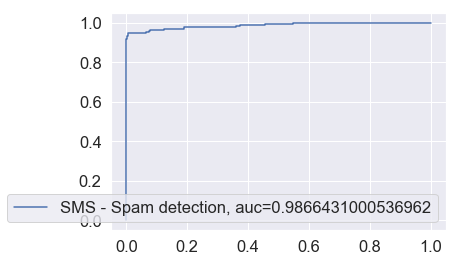

In [37]:
import matplotlib.pyplot as plt
y_pred_proba = nb.predict_proba(X_test_dtm)[:,1]

# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)
# sklearn.metrics.roc_curve(y_true, y_score, pos_label=None)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="SMS - Spam detection, auc="+str(auc))
plt.legend(loc=4)

In [38]:
words_ham = ' '.join(X_ham)

In [39]:
# words_ham
type(words_ham)

str

In [41]:
# pip install wordcloud
wordcloud = WordCloud(width = 800, 
                     height = 800, 
                     background_color ='white', 
                     #stopwords = stopwords, 
                     min_font_size = 10).generate(words_ham) 

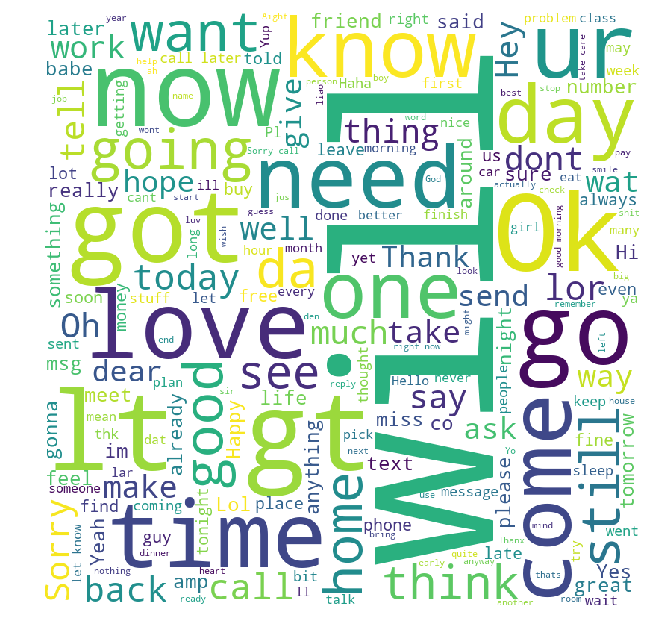

In [42]:
# plot the WordCloud image                        
plt.figure(figsize = (9, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [43]:
metrics.roc_curve(y_test,  y_pred_proba)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00165563, 0.00248344, 0.00248344, 0.00413907, 0.00413907,
        0.01241722, 0.01490066, 0.0455298 , 0.04801325, 0.06374172,
        0.06374172, 0.07284768, 0.07284768, 0.07698675, 0.07698675,
        0.08360927, 0.08609272, 0.0968543 , 0.09850993, 0.12417219,
        0.12417219, 0.16887417, 0.1705298 , 0.18046358, 0.18294702,
        0.18874172, 0.18874172, 0.19039735, 0.19039735, 0.22019868,
        0.2218543 , 0.22268212, 0.22433775, 0.25413907, 0.25662252,
        0.28145695, 0.28311258, 0.31705298, 0.32533113, 0.36175497,
        0.36175497, 0.37334437, 0.37334437, 0.3865894 , 0.38824503,
        0.44039735, 0.44205298, 0.45612583, 0.45612583, 0.54718543,
        0.54718543, 0.54884106, 0.55049669, 0.66804636, 0.66970199,
        0.78476821, 0.78642384, 0.87665563, 0.87

In [46]:
# Compare models
# Logistic regression, despite its name is a linear model for classification 
# rather than regression. Also known as "logit regression", Maximum-entropy
# classification (MaxEnt) or log-linear classifier.
# 
logreg = LogisticRegression(solver='lbfgs', max_iter=500)

In [47]:
# train the model
%time logreg.fit(X_train_dtm, y_train)

# slower than NB

Wall time: 222 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Predict using X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [49]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [50]:
# Calculate the predicted probabilities for X-test_dtm (poorly caliberated)
# why 1
# positive class
# probabilities are well caliberated
print(logreg.predict_proba(X_test_dtm)[:20])

y_pred_proba = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_proba

[[9.90406227e-01 9.59377345e-03]
 [9.97043380e-01 2.95661985e-03]
 [9.95475755e-01 4.52424455e-03]
 [9.92496029e-01 7.50397075e-03]
 [9.88041278e-01 1.19587220e-02]
 [9.99199488e-01 8.00511904e-04]
 [9.91651254e-01 8.34874620e-03]
 [9.96494130e-01 3.50587025e-03]
 [9.95270941e-01 4.72905934e-03]
 [9.99142567e-01 8.57432928e-04]
 [9.98238894e-01 1.76110649e-03]
 [9.95093694e-01 4.90630625e-03]
 [9.94636512e-01 5.36348814e-03]
 [9.83307784e-01 1.66922162e-02]
 [9.95164392e-01 4.83560812e-03]
 [9.97816018e-01 2.18398199e-03]
 [1.03590127e-03 9.98964099e-01]
 [9.83251358e-01 1.67486418e-02]
 [4.18917218e-02 9.58108278e-01]
 [9.77539807e-01 2.24601932e-02]]


array([0.00959377, 0.00295662, 0.00452424, ..., 0.031302  , 0.99748962,
       0.00119521])

In [66]:
# array([[9.97122551e-01, 2.87744864e-03],
#        [9.99981651e-01, 1.83488846e-05],
#        [9.97926987e-01, 2.07301295e-03],
#        ...,
#        [9.99998910e-01, 1.09026171e-06],
#        [1.86697467e-10, 1.00000000e+00],
#        [9.99999996e-01, 3.98279868e-09]])

# in DS, it is not about the FINAL classification, for ML practitioner it is about the PROCESS which led to the classification

In [52]:
# Calculate AUC

metrics.roc_auc_score(y_test, y_pred_proba)

0.9936280651512441

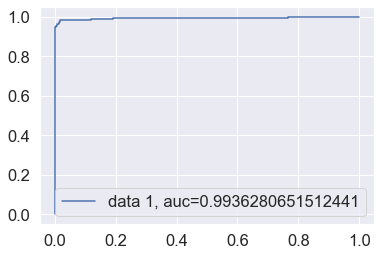

In [53]:
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test_dtm)[:,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [54]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1207,    1],
       [  16,  169]], dtype=int64)

In [55]:
# Examine a model

# Get all the tokens/features
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

7456

In [57]:
X_train_tokens[0:10]

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400']

In [58]:
X_train_tokens[-10:]

['zed',
 'zeros',
 'zhong',
 'zindgi',
 'zoe',
 'zoom',
 'zouk',
 'zyada',
 'èn',
 '〨ud']

In [59]:
# naive bayes counts the number of time each token appears in each class
# why ?
# ans : conditional probaility
# trailing _ attribute ... means scikit learn creates this during the 
# training process (fit process)
nb.feature_count_

array([[ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 5., 23.,  2., ...,  0.,  0.,  0.]])

In [60]:
type(nb.feature_count_)

numpy.ndarray

In [76]:
nb.feature_count_.shape

(2, 7456)

In [61]:
# capture the ham & spam rows from the array
ham_token_count  = nb.feature_count_[0, :]
spam_token_count = nb.feature_count_[1, :]

In [62]:
# create a dataframe
tokens = pd.DataFrame({'tokens': X_train_tokens, 'ham': ham_token_count, 'spam': spam_token_count})

In [63]:
tokens.head()

,tokens,ham,spam
0,00,0.0,5.0
1,000,0.0,23.0
2,008704050406,0.0,2.0
3,0121,0.0,1.0
4,01223585236,0.0,1.0


In [64]:
# display 10 random tokens
tokens.sample(10, random_state=6)

,tokens,ham,spam
6977,very,64.0,2.0
4521,nasty,1.0,1.0
6999,villa,0.0,1.0
1266,beloved,1.0,0.0
6522,textoperator,0.0,2.0
1035,arng,2.0,0.0
250,1013,0.0,1.0
5703,scores,1.0,1.0
4504,nahi,2.0,0.0
4036,long,35.0,0.0


In [65]:
# naive bayes counts the number of observations in each class
nb.class_count_

array([3617.,  562.])

In [66]:
tokens['ham']  = tokens.ham + 1
tokens['spam'] = tokens.spam + 1

tokens.sample(5, random_state=6)

,tokens,ham,spam
6977,very,65.0,3.0
4521,nasty,2.0,2.0
6999,villa,1.0,2.0
1266,beloved,2.0,1.0
6522,textoperator,1.0,3.0


In [67]:
# convert the ham and spam counts into frequencies
tokens['ham']  = tokens.ham/  nb.class_count_[0]
tokens['spam'] = tokens.spam/ nb.class_count_[1]
tokens.sample(5, random_state=6)

,tokens,ham,spam
6977,very,0.017971,0.005338
4521,nasty,0.000553,0.003559
6999,villa,0.000276,0.003559
1266,beloved,0.000553,0.001779
6522,textoperator,0.000276,0.005338


In [68]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam/tokens.ham
tokens.sample(5, random_state=6)

,tokens,ham,spam,spam_ratio
6977,very,0.017971,0.005338,0.297044
4521,nasty,0.000553,0.003559,6.435943
6999,villa,0.000276,0.003559,12.871886
1266,beloved,0.000553,0.001779,3.217972
6522,textoperator,0.000276,0.005338,19.307829


In [70]:
# examine the dataframe sorted by spam_ratio
tokens.sort_values('spam_ratio', ascending=False)

,tokens,ham,spam,spam_ratio
1766,claim,0.000276,0.158363,572.798932
5209,prize,0.000276,0.135231,489.131673
293,150p,0.000276,0.087189,315.361210
6680,tone,0.000276,0.085409,308.925267
3139,guaranteed,0.000276,0.076512,276.745552
307,18,0.000276,0.069395,251.001779
2022,cs,0.000276,0.065836,238.129893
7357,www,0.000553,0.129893,234.911922
246,1000,0.000276,0.056940,205.950178
1130,awarded,0.000276,0.053381,193.078292


In [65]:
# look up for a specfic token
tokens.loc[tokens['tokens'] == 'tariff']

,ham,spam,tokens,spam_ratio


In [44]:
# vectorizer tuning
import nltk
from nltk.corpus import stopwords
from string import punctuation

# Stemmer
from nltk.stem import PorterStemmer
porter = PorterStemmer()

# lemmatizing
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [45]:
# Stopwords from stopwords-json
# https://raw.githubusercontent.com/6/stopwords-json/master/dist/en.json

stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}

In [47]:
stopwords_json_en = set(stopwords_json['en'])
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct   = set(punctuation)

In [48]:
# Combine the stopwords. Its a lot longer so I'm not printing it out...
stoplist_combined = set.union(stopwords_json_en, stopwords_nltk_en, stopwords_punct)

In [49]:
vect = CountVectorizer(stop_words=stoplist_combined, 
                       token_pattern='(?u)\\b[a-zA-Z]{3,}\\b')

In [77]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'!', '"', '#', '$', '%', '&', "'", '(', ')', '*',
                            '+', ',', '-', '.', '/', ':', ';', '<', '=', '>',
                            '?', '@', '[', '\\', ']', '^', '_', '`', 'a', "a's", ...},
                strip_accents=None, token_pattern='(?u)\\b[a-zA-Z]{3,}\\b',
                tokenizer=None, vocabulary=None)

In [78]:
# learn training data vocabulary, then use it to create the fitted vocabulary
# and create the document-term matrix
# 2-step process
%time
vect.fit(X_train)                     # create the fitted vocabulary
X_train_dtm = vect.transform(X_train) # create the document-term matrix

Wall time: 0 ns


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['mon'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [79]:
# Number of rows = number of training samples,
# number of columns = features
X_train_dtm.shape

(4179, 5943)

In [80]:
# transform testing data (using fitted vocabulary) into a document-term maxtri
# with test data, we do not do fit
# Matrix will be Number of testing samples x No of features in Vect (training)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<1393x5943 sparse matrix of type '<class 'numpy.int64'>'
	with 7238 stored elements in Compressed Sparse Row format>

In [81]:
# Build Model
# Multinomial Naive Bayes classifier is suitable for classification with 
# DISCRETE features (word counts for text classification)
# The multinomial distribution normally requires integer feature counts.
# However, in practice, fractional counts such as tf-idf may also work
nb = MultinomialNB()

In [82]:
# train the model using X_train_dtm
# time it with an Ipython "magic command"
%time nb.fit(X_train_dtm, y_train)

Wall time: 3 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [84]:
# Calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_class)

0.9806173725771715

In [85]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1192,   16],
       [  11,  174]], dtype=int64)

In [86]:
# Exercise
# print the word cloud (after the stopwords removal etc)